In [61]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [11]:
from IPython.display import HTML

style = "<style>svg{width:70% !important; height:70% !important;}</style>"
HTML(style)

In [12]:
titanic_data = pd.read_csv('../titanic/train.csv')

In [13]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data.Survived

In [16]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [17]:
X = pd.get_dummies(X)

In [18]:
X = X.fillna({'Age': X.Age.median()})

In [19]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [20]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [21]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [22]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [26]:
clf.score(X_test, y_test)

0.7728813559322034

In [27]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [28]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [29]:
clf.score(X_train, y_train)

0.8406040268456376

In [30]:
clf.score(X_test, y_test)

0.8067796610169492

In [31]:
max_depth_values = range(1, 100)

In [32]:
scores_data = pd.DataFrame()

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

C:\Users\mrbab\AppData\Local\Temp\ipykernel_17900\1641617083.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\mrbab\AppData\Local\Temp\ipykernel_17900\1641617083.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\mrbab\AppData\Local\Temp\ipykernel_17900\1641617083.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\mrbab\AppData\Local\Temp\ipykernel_17900\1641617083.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_

In [35]:
scores_data

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.795350
...,...,...,...,...
0,95,0.979866,0.752542,0.773543
0,96,0.979866,0.772881,0.773557
0,97,0.979866,0.762712,0.770182
0,98,0.979866,0.762712,0.775224


In [36]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'],
                           value_vars=['train_score', 'test_score', 'cross_val_score'],
                           var_name='set_type', value_name='score')

In [37]:
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604
...,...,...,...
292,95,cross_val_score,0.773543
293,96,cross_val_score,0.773557
294,97,cross_val_score,0.770182
295,98,cross_val_score,0.775224


<Axes: xlabel='max_depth', ylabel='score'>

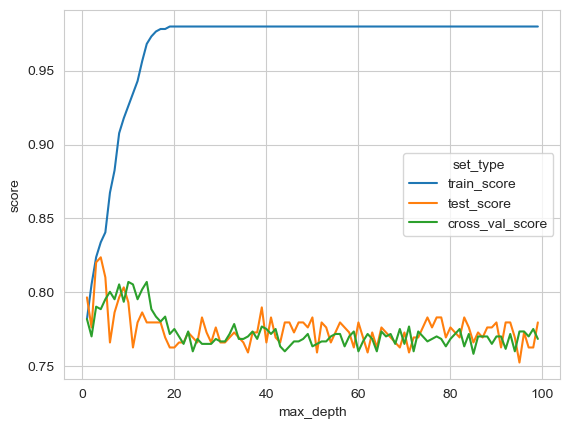

In [38]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [39]:
scores_data_long.query("set_type == 'cross_val_score'").score.max()

0.8070728291316526

In [40]:
scores_data_long.query("set_type == 'cross_val_score' and score == 0.8087535014005601")

,max_depth,set_type,score


In [41]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=11)

In [42]:
cross_val_score(best_clf, X_test, y_test, cv=5).mean()

0.7898305084745763

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
clf = tree.DecisionTreeClassifier()

In [45]:
parametrs = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)}

In [46]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=5)

In [47]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [48]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 10}

In [49]:
best_clf = grid_search_cv_clf.best_estimator_

In [50]:
best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [51]:
best_clf.score(X_test, y_test)

0.8033898305084746

In [53]:
from sklearn.metrics import precision_score, recall_score

In [54]:
y_pred = best_clf.predict(X_test)

In [55]:
precision_score(y_test, y_pred)

0.8297872340425532

In [56]:
recall_score(y_test, y_pred)

0.65

In [57]:
y_predicted_prob = best_clf.predict_proba(X_test)

In [58]:
y_predicted_prob

array([[0.55555556, 0.44444444],
       [0.75      , 0.25      ],
       [0.93913043, 0.06086957],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.25      , 0.75      ],
       [0.93913043, 0.06086957],
       [0.25      , 0.75      ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.88      , 0.12      ],
       [1.        , 0.        ],
       [0.86666667, 0.13333333],
       [0.88      , 0.12      ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.93913043, 0.06086957],
       [1.        , 0.        ],
       [0.93913043, 0.06086957],
       [0.63157895, 0.36842105],
       [0.66666667, 0.33333333],
       [0.93913043, 0.06086957],
       [0.93913043, 0.06086957],
       [1.        , 0.        ],
       [0.63157895, 0.36842105],
       [0.75      , 0.25      ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.

<Axes: >

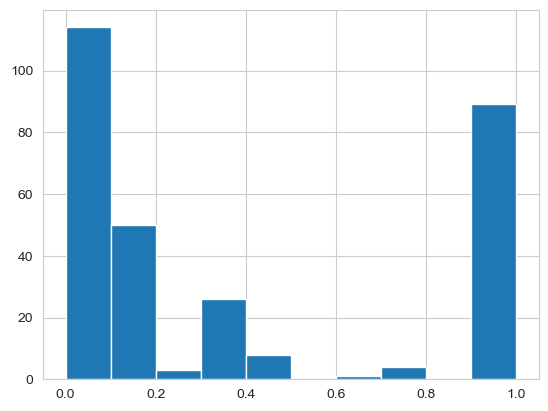

In [60]:
pd.Series(y_predicted_prob[:, 1]).hist()

In [68]:
y_pred = np.where(y_predicted_prob[:, 1] > 0.8, 1, 0)

In [69]:
precision_score(y_test, y_pred)

0.8426966292134831

In [70]:
recall_score(y_test, y_pred)

0.625

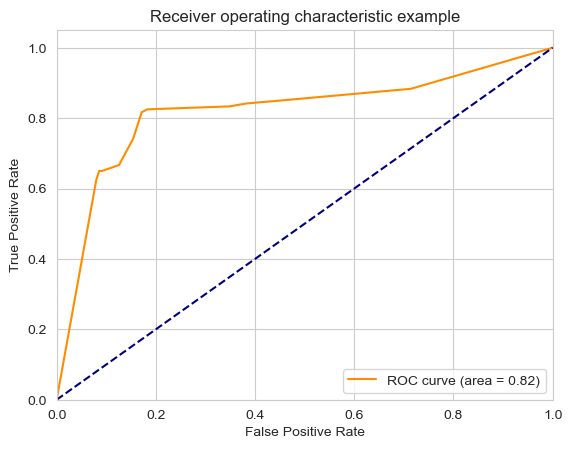

In [74]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
dt = tree.DecisionTreeClassifier(max_depth=5, min_samples_split=5)